In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
i_data = load_iris()

In [6]:
dir(i_data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [17]:
df = pd.DataFrame(i_data.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
i_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
df['target iris'] = i_data.target
df.head()

,0,1,2,3,target iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target iris'],axis='columns'),i_data.target,test_size=0.2)

In [29]:
len(X_train)

120

In [31]:
len(X_test)

30

In [76]:
# use random forest classifier
# ensemble -> term use when we use multilpe algorithms to predict the outcome ,
# here we r building multiple decision trees and predict final outcome

from sklearn.ensemble import RandomForestClassifier
forest_iris=RandomForestClassifier(n_estimators=50)

In [77]:
forest_iris.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
forest_iris.score(X_test,y_test)

0.9666666666666667

In [42]:
# we plot confusion matrix  - this matrix allows us to plot truth on one axis and prediction on another axis
#here truth is - y_test & y_predicted is predicted by model

y_predict = forest_iris.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 10]], dtype=int64)

Text(69,0.5,'Truth')

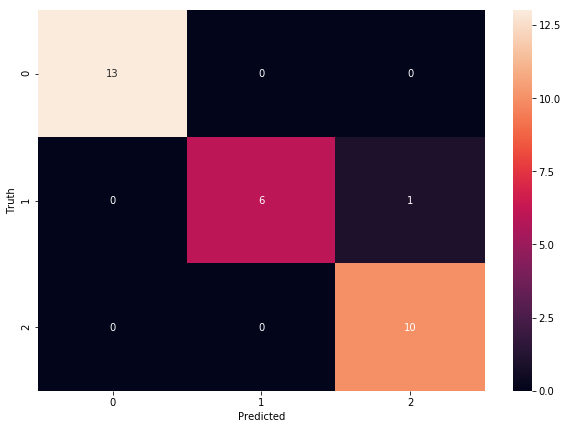

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')